# Pengenalan Pola

## Lab 3: Gaussian Mixture Models

In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

In [2]:
# Matplotlib styling, bisa diabaikan
plt.rcParams = plt.rcParamsOrig

In [3]:
np.random.seed(1945)

x1 = 10 * np.random.random(size=10)
x2 = 20 * np.random.random(size=10)
x = np.concatenate([x1, x2])
xx = np.linspace(0, 20, 1000)

In [4]:
# trust me these are randomised
mu_a = 11.4
mu_b = 14.3
std_a = 1.
std_b = 1.

In [5]:
print(mu_a, mu_b)
print(std_a, std_b)

11.4 14.3
1.0 1.0


In [6]:
def draw_plot(mu_a, std_a, mu_b, std_b):
    plt.plot(xx, norm.pdf(xx, mu_a, std_a))
    plt.plot(xx, norm.pdf(xx, mu_b, std_b))
    plt.ylim(-.05, .45)
    plt.xlabel('x')
    plt.ylabel('p(x|c)')

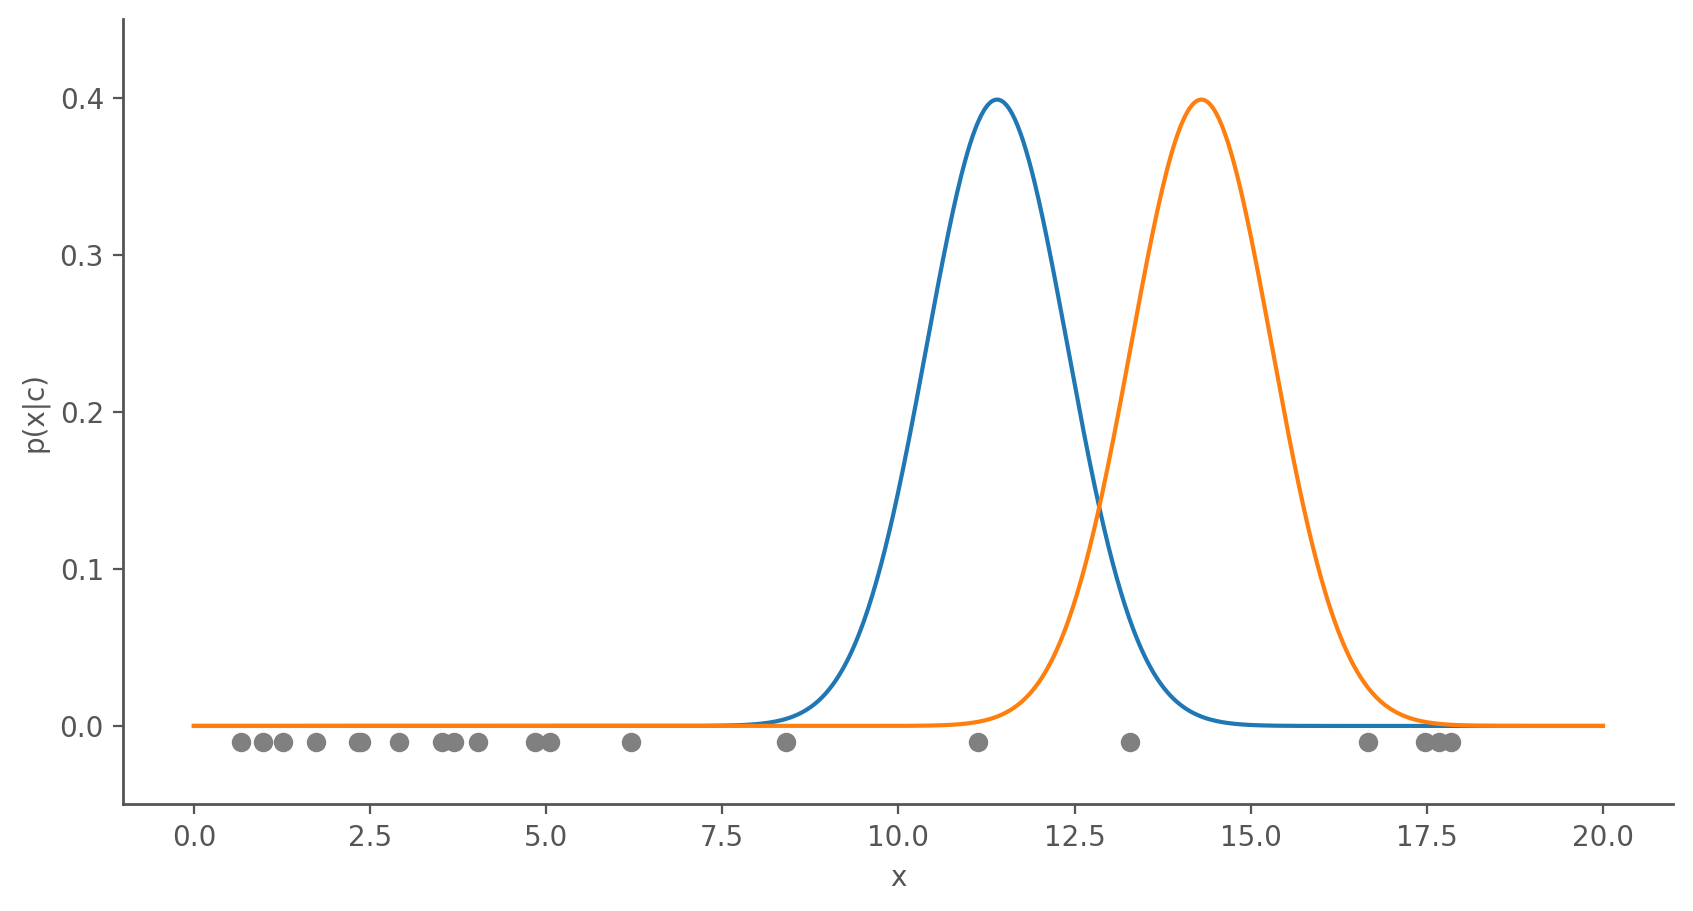

In [7]:
plt.scatter(x, np.zeros(len(x)) - .01, color='gray', marker='o')
draw_plot(mu_a, std_a, mu_b, std_b)

## E-step

Menghitung nilai
$$
P(x_i|c) = \mathcal{N}(x_i; \mu_c, \sigma_c^2)
$$
lalu
$$
c_i = P(c|x_i) = \frac{P(x_i|c)P(c)}{P(x_i)}
$$

In [8]:
# priors
p_a = (len(x) // 2) / 2
p_b = 1 - p_a

def e_step(x, mu_a, std_a, mu_b, std_b, p_a, p_b):
    p_xa = norm.pdf(x, mu_a, std_a)
    p_xb = norm.pdf(x, mu_b, std_b)

    # posteriors = probabilities ~ weights
    a = (p_xa * p_a) / (p_xa * p_a + p_xb * p_b)
    b = 1 - a
    return a, b

a, b = e_step(x, mu_a, std_a, mu_b, std_b, p_a, p_b)

## M-step

Menghitung nilai $\mu_a, \mu_b, \sigma_a^2, \sigma_b^2$ yang baru dengan
$$
\mu_c = \frac{\mathbf{c}^T \mathbf{x}}{\|c\|}
$$
dan
$$
\sigma_c^2 = \frac{\mathbf{c}^T (\mathbf{x}-\mathbf{1}\mu_c)}{\|c\|}
$$

In [9]:
def m_step(x, a, b):
    mu_a = np.dot(a, x) / np.sum(a)
    mu_b = np.dot(b, x) / np.sum(b)

    std_a = np.sqrt(np.dot(a, (x - mu_a) ** 2) / np.sum(a))
    std_b = np.sqrt(np.dot(b, (x - mu_b) ** 2) / np.sum(b))

    # Memperbarui nilai priors
    p_a = np.sum(a) / len(a)
    p_b = 1 - a
    return mu_a, mu_b, std_a, std_b, p_a, p_b

In [10]:
colors = sns.color_palette()

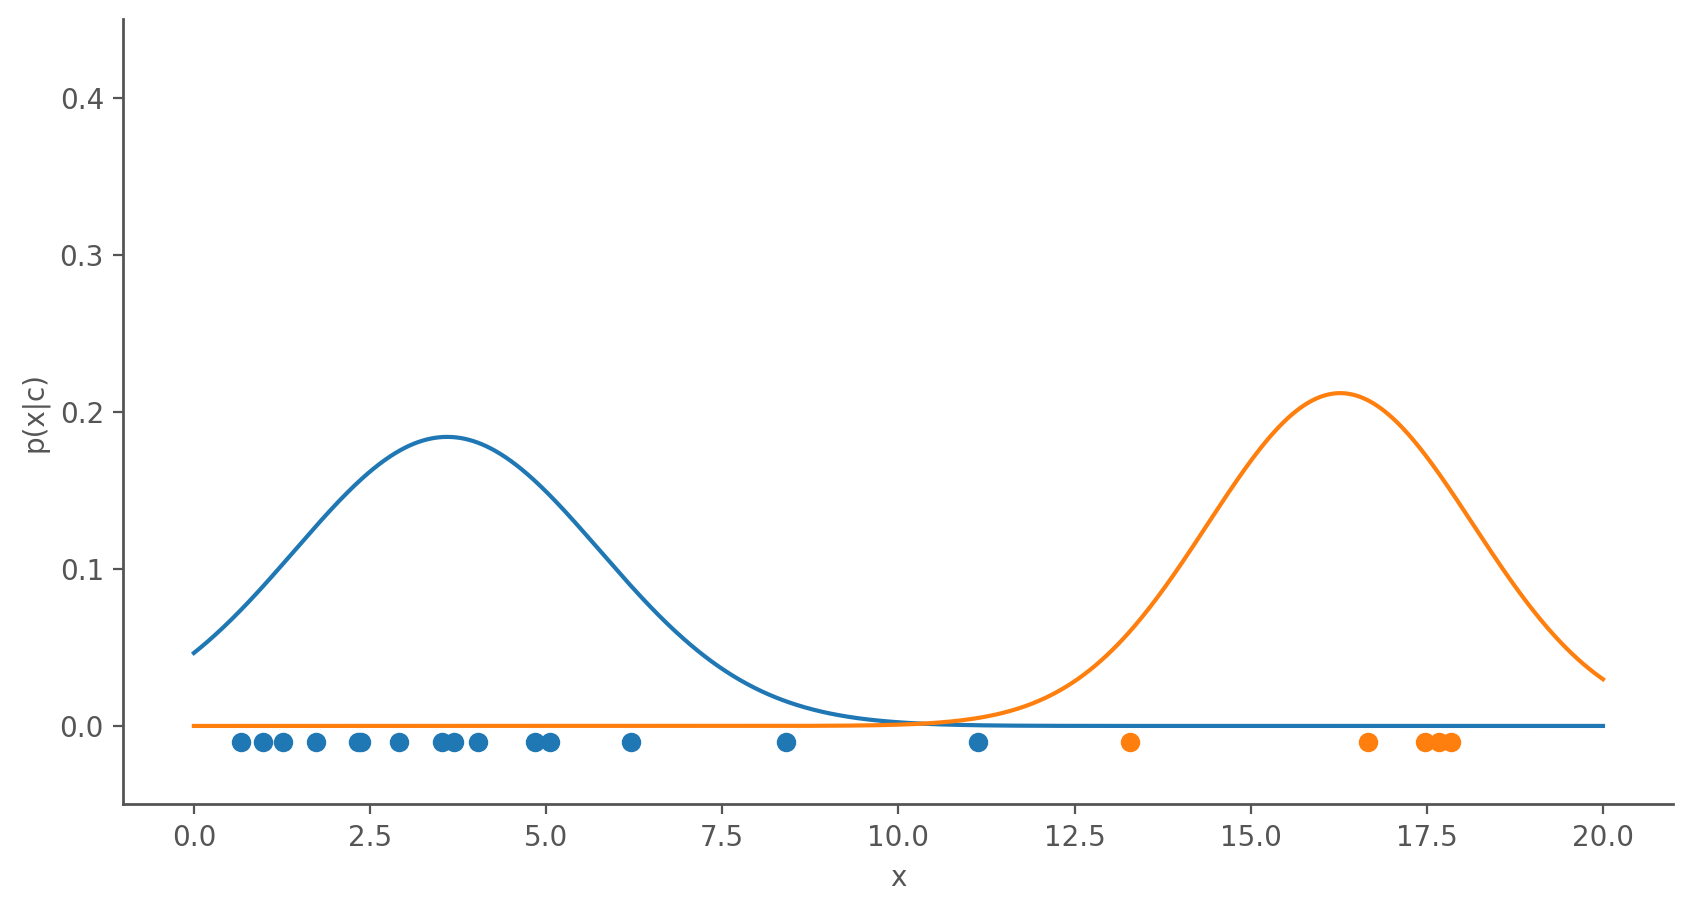

In [11]:
mu_a, mu_b, std_a, std_b, p_a, p_b = m_step(x, a, b)
plt.scatter(x[a > b], np.zeros(np.sum(a > b)) - .01)
plt.scatter(x[a < b], np.zeros(np.sum(a < b)) - .01)
draw_plot(mu_a, std_a, mu_b, std_b);

In [12]:
print(mu_a, mu_b)
print(std_a, std_b)

3.595415507175978 16.271008499132023
2.1669259032596413 1.8819449270177164


## Iterasi Kedua

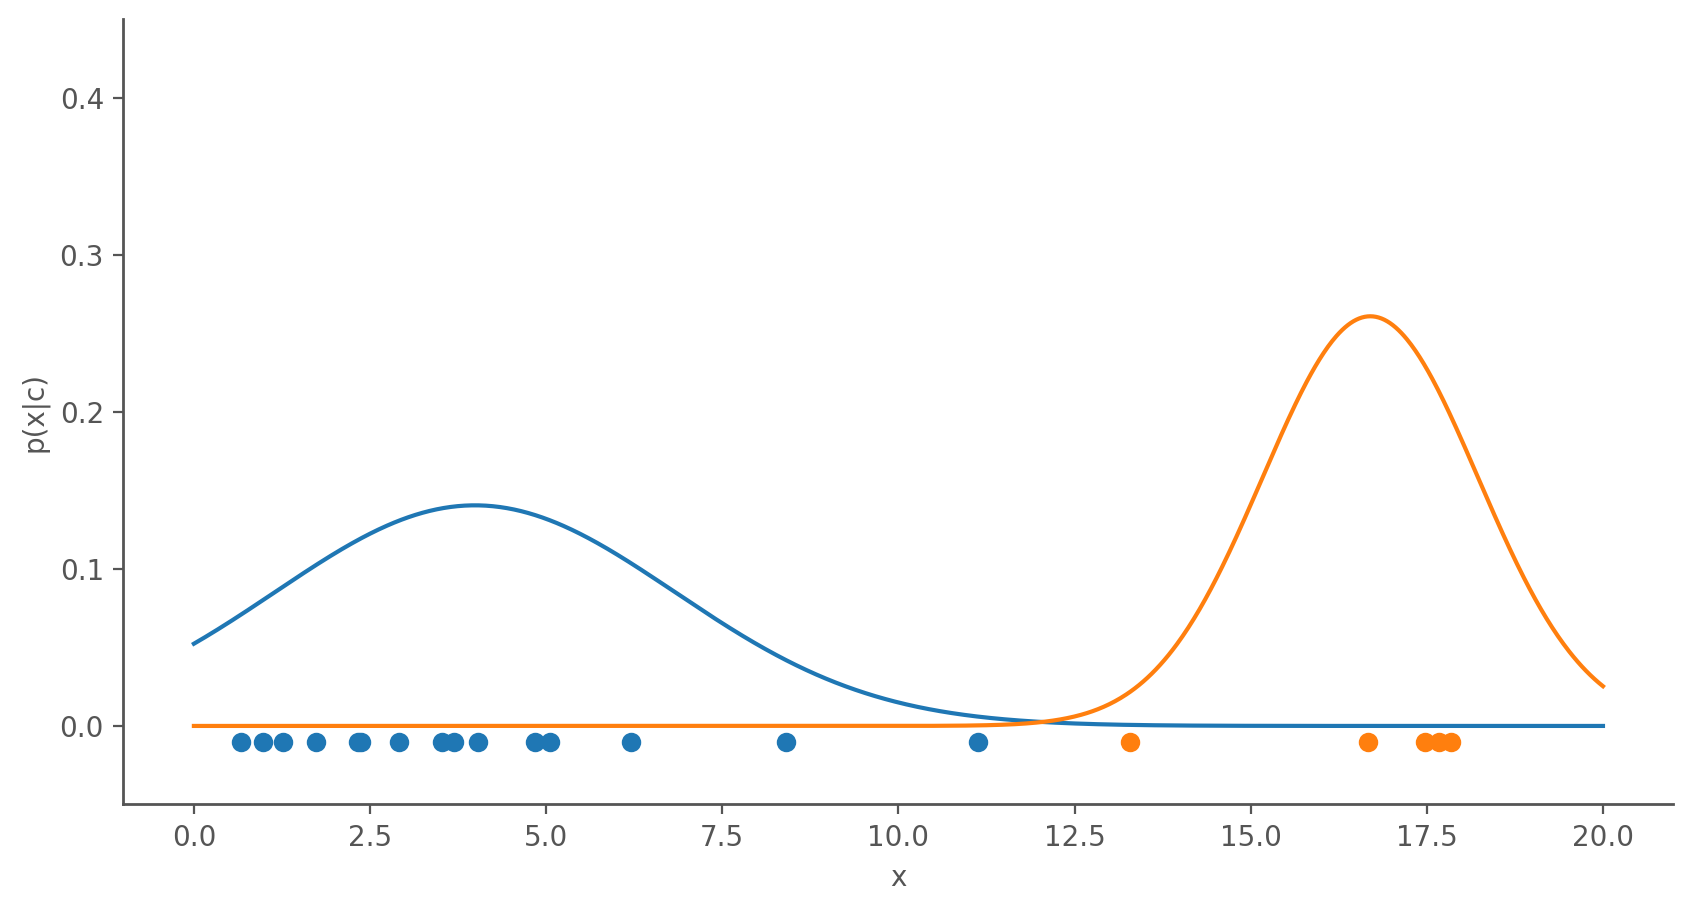

In [13]:
a, b = e_step(x, mu_a, std_a, mu_b, std_b, p_a, p_b)
mu_a, mu_b, std_a, std_b, p_a, p_b = m_step(x, a, b)
plt.scatter(x[a > b], np.zeros(np.sum(a > b)) - .01, marker='o')
plt.scatter(x[a < b], np.zeros(np.sum(a < b)) - .01, marker='o')
draw_plot(mu_a, std_a, mu_b, std_b);

## Scikit-Learn

In [14]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(x.reshape(-1,1))
labels = gmm.predict(x.reshape(-1,1))

In [15]:
mu_a, mu_b = gmm.means_[:,0]
gmm.means_

array([[ 3.3622064],
       [15.4482182]])

In [16]:
std_a, std_b = np.sqrt(gmm.covariances_[:,0])
gmm.covariances_

array([[[4.11630902]],

       [[7.99477426]]])

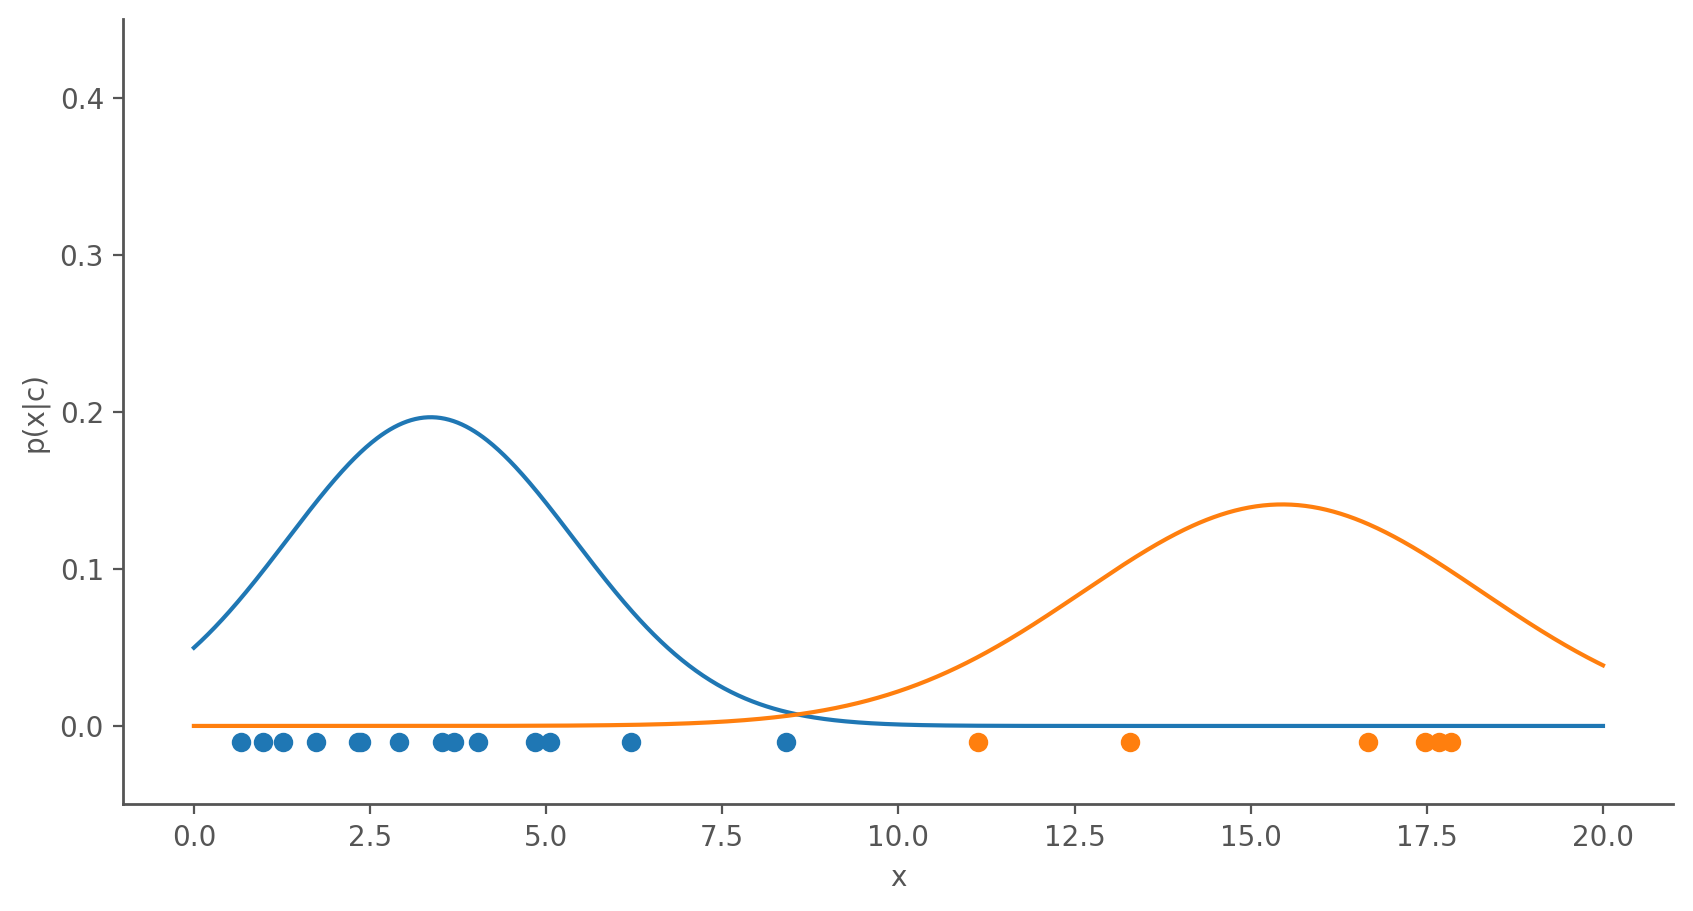

In [17]:
plt.scatter(x[labels == 0], np.zeros(x[labels == 0].shape[0]) - .01, marker='o')
plt.scatter(x[labels == 1], np.zeros(x[labels == 1].shape[0]) - .01, marker='o')
draw_plot(mu_a, std_a, mu_b, std_b);